In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

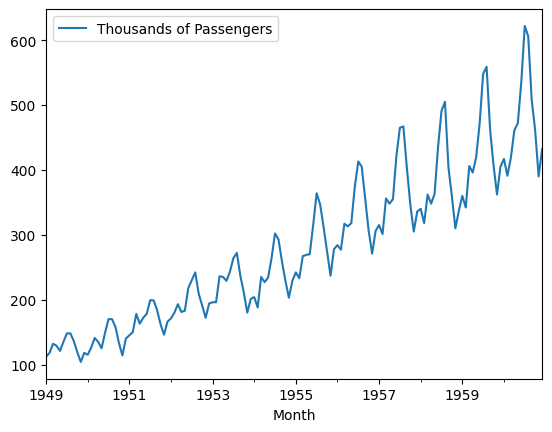

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

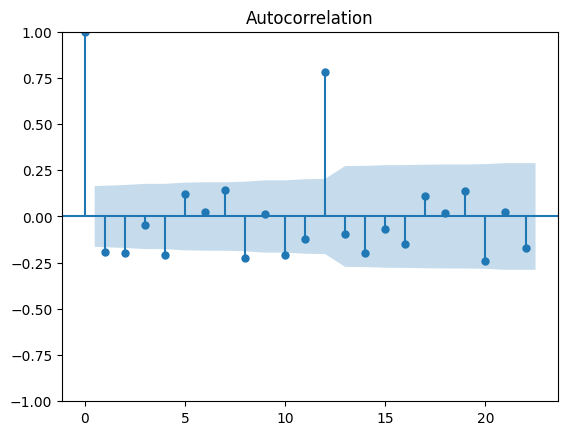

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

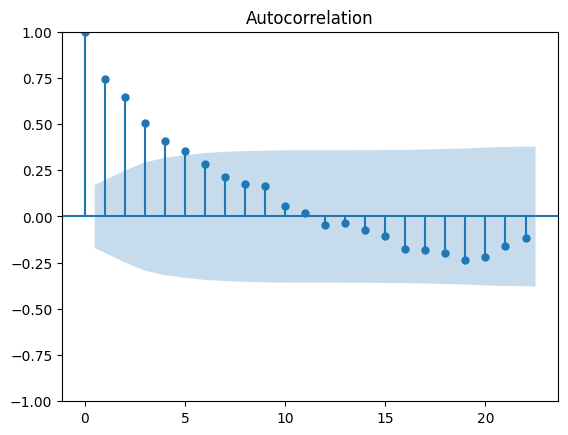

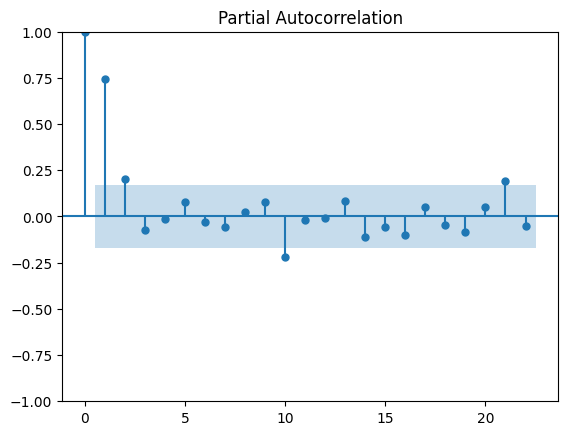

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

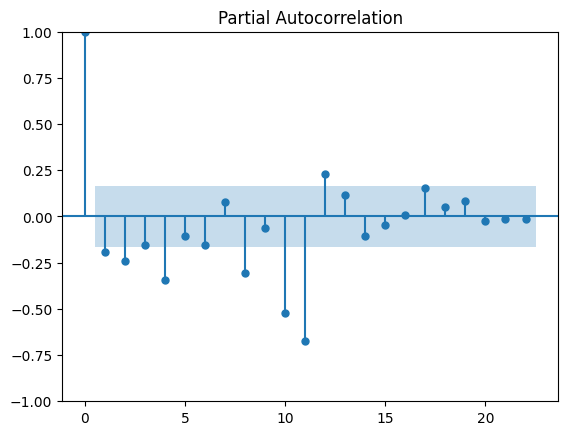

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

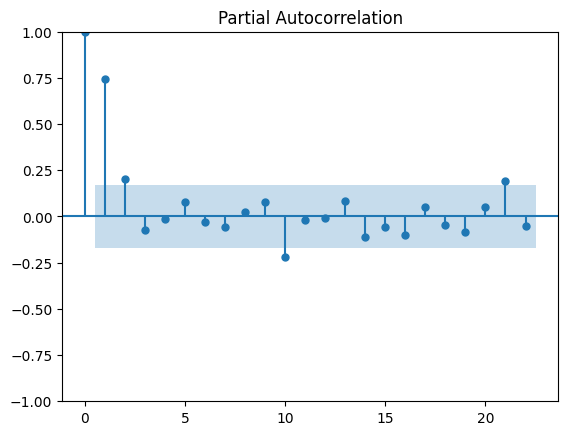

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [34]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [35]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [56]:
from statsmodels.tsa.arima.model import ARIMA  # Use the correct path


In [211]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(4,0,11))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [212]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [213]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(4, 0, 11)   Log Likelihood                -347.266
Date:                     Wed, 24 Jan 2024   AIC                            728.532
Time:                             20:51:05   BIC                            769.856
Sample:                         01-01-1949   HQIC                           745.144
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        197.3636   1458.175      0.135      0.892   -2660.607    3055.334
ar.L1          1.8769      0.199      9.416      0.000       1.486       2.268
ar.L2         -1.7561      0.377     -4.654      0.000      -2.496      -1.017
ar.L3          0.7990      0.392      2.036      0.042       0.030       1.568
ar.L4          0.0783      0.216      0.362      0.717      -0.345       0.502
ma.L1         -0.8783     28.255     -0.031      0.975     -56.257      54.501
ma.L2          0.9367     42.012      0.022      0.982     -81.406      83.279
ma.L3         -0.2496      6.623     -0.038      0.970     -13.231      12.732
ma.L4         -0.0196     18.110     -0.001      0.999     -35.515      35.476
ma.L5         -0.0687      3.122     -0.022      0.982      -6.188       6.051
ma.L6         -0.3050     14.704     -0.021      0.983     -29.124      28.515
ma.L7          0.0547     13.428      0.004      0.997     -26.264      26.373
ma.L8         -0.0626     17.376     -0.004      0.997     -34.118      33.993
ma.L9          0.6022      1.805      0.334      0.739      -2.936       4.141
ma.L10        -0.5860      5.036     -0.116      0.907     -10.455       9.283
ma.L11         0.8717     43.390      0.020      0.984     -84.171      85.915
sigma2       166.0850   8264.045      0.020      0.984    -1.6e+04    1.64e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.15
Prob(Q):                              0.82   Prob(JB):                         0.13
Heteroskedasticity (H):               3.55   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [214]:
test_data.head(3)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA,Predicted_ARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,NaN,295.187068
1956-02-01,277.0,-7.0,-13.0,44.0,NaN,308.347265
1956-03-01,317.0,40.0,47.0,50.0,NaN,308.008082


In [215]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [216]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [217]:
pred.head(4)

1956-01-01    306.705164
1956-02-01    323.079801
1956-03-01    332.821597
1956-04-01    331.432514
Freq: MS, Name: predicted_mean, dtype: float64

In [218]:
residuals.head(3)

Month
1956-01-01   -22.705164
1956-02-01   -46.079801
1956-03-01   -15.821597
dtype: float64

<Axes: ylabel='Density'>

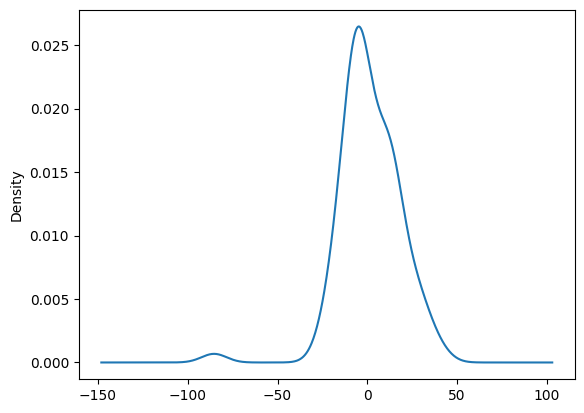

In [219]:
model_Arima_fit.resid.plot(kind='kde')

In [220]:
test_data['Predicted_ARIMA']=pred

<ipython-input-220-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

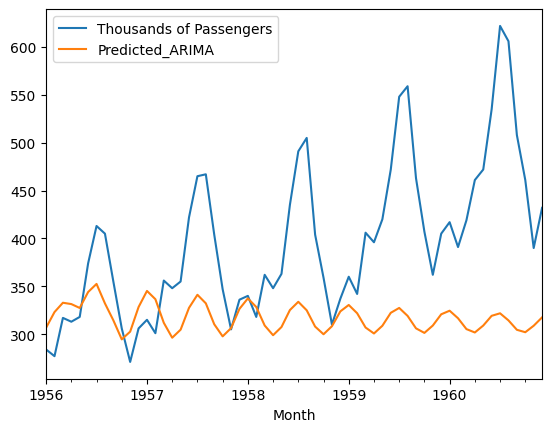

In [221]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

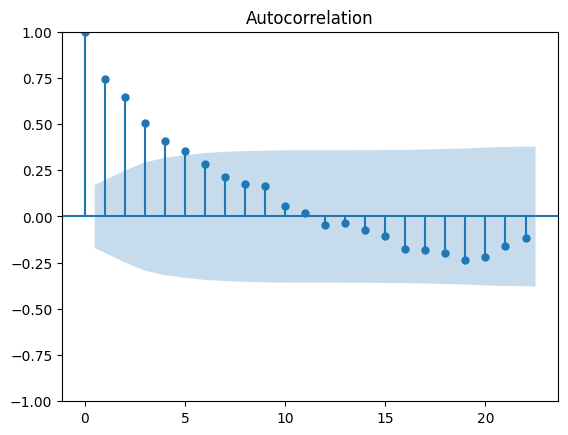

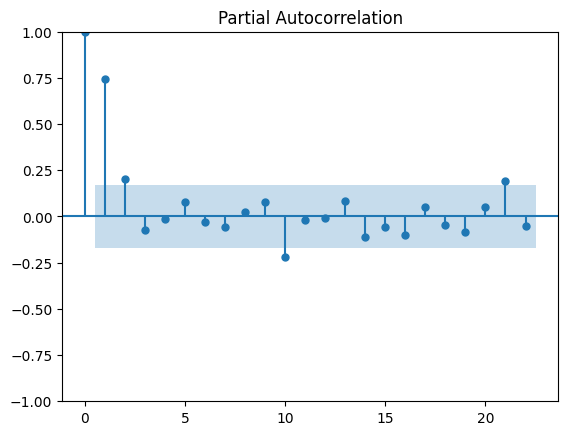

In [223]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [224]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [225]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(4,0,11),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [226]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [227]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(4, 0, 11)x(0, 1, [], 12)   Log Likelihood                -262.536
Date:                              Wed, 24 Jan 2024   AIC                            557.072
Time:                                      20:51:18   BIC                            593.499
Sample:                                  01-01-1949   HQIC                           571.574
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4896      0.267      1.836      0.066      -0.033       1.012
ar.L2         -0.1470      0.301     -0.489      0.625      -0.736       0.442
ar.L3         -0.2435      0.294     -0.827      0.408      -0.820       0.333
ar.L4          0.8214      0.235      3.490      0.000       0.360       1.283
ma.L1          0.3047      1.296      0.235      0.814      -2.236       2.846
ma.L2          0.5893      0.821      0.718      0.473      -1.020       2.198
ma.L3          0.5996      1.623      0.370      0.712      -2.581       3.780
ma.L4         -0.2824      0.794     -0.356      0.722      -1.838       1.274
ma.L5         -0.0053      0.499     -0.011      0.991      -0.983       0.973
ma.L6         -0.1328      0.461     -0.288      0.773      -1.037       0.771
ma.L7          0.0870      0.392      0.222      0.824      -0.682       0.856
ma.L8          0.0402      0.293      0.137      0.891      -0.534       0.614
ma.L9          0.2022      0.316      0.640      0.522      -0.417       0.821
ma.L10         0.0551      0.221      0.249      0.803      -0.379       0.489
ma.L11         0.0701      0.215      0.325      0.745      -0.352       0.492
sigma2        80.2160     91.006      0.881      0.378     -98.153     258.585
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.85   Prob(JB):                         0.28
Heteroskedasticity (H):               2.23   Skew:                             0.45
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
test_data.tail(2)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA,Predicted_ARIMA
Month,,,,,,
1960-11-01,390.0,-71.0,-24.0,28.0,342.297537,308.808747
1960-12-01,432.0,42.0,113.0,27.0,380.322941,317.550935


In [229]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [230]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

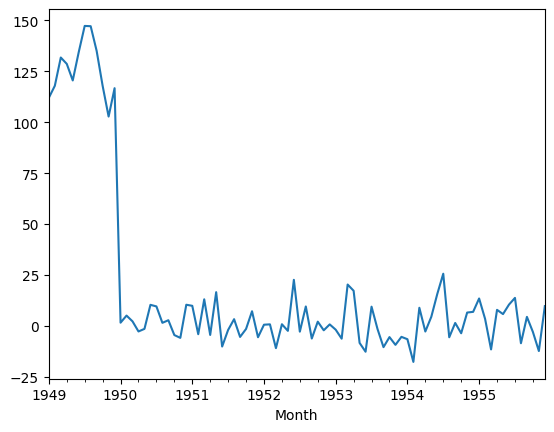

In [231]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

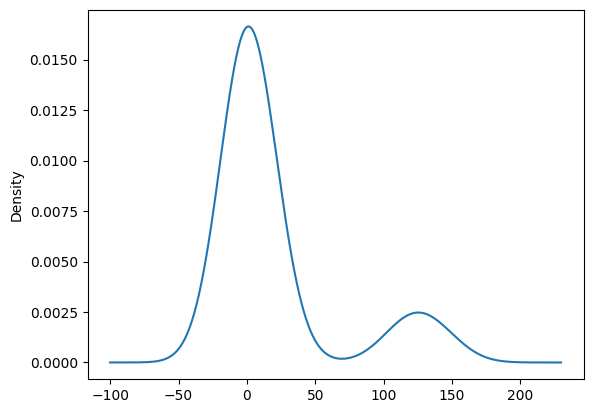

In [232]:
model_SARIMA_fit.resid.plot(kind='kde')

In [233]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-233-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [234]:
test_data.head(2)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA,Predicted_ARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,NaN,306.705164
1956-02-01,277.0,-7.0,-13.0,44.0,NaN,323.079801


<Axes: xlabel='Month'>

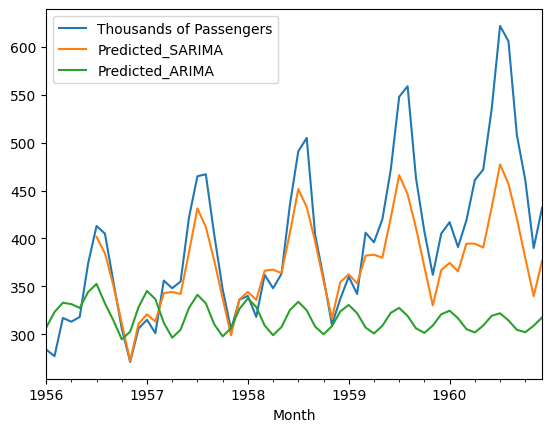

In [235]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()